# Изучение рынка заведений общественного питания Москвы


### Цель проекта

Проведение исследовательского анализа рынка общественного питания Москвы для того, чтобы инвестиционный фонд мог принять решение о месте размещения нового заведения.


### Содержимое проекта

1. Загрузка данных и знакомство с ними.
   - 1.1. Подготовка единого датафрейма.  
>
2. Предобработка данных.
   - 2.1. Оптимизация типов данных.
   - 2.2. Изучение наличия пропусков в данных.
   - 2.3. Обработка явных и неявных дубликатов в данных.
>
3. Исследовательский анализ данных.
   - 3.1. Задача 1. Категории заведений и объекты общественного питания.
   - 3.2. Задача 2. Распределение заведений по районам Москвы.
   - 3.3. Задача 3. Распределение сетевых и несетевых заведений.
   - 3.4. Задача 4. Распределение посадочных мест в заведениях.
   - 3.5. Задача 5. Распределение рейтингов заведений.
   - 3.6. Задача 6. Корреляция рейтингов заведений.
   - 3.7. Задача 7. Топ-15 популярных сетей в Москве.
   - 3.8. Задача 8. Средний чек заведений.
   - 3.9. Промежуточный вывод этапа исследовательского анализа данных
>
4. Итоговые выводы.
   - 4.1. Общий обзор проделанной работы.
   - 4.2. Рекомендации на основе анализа данных.
   
---

## 1. Загрузка данных и знакомство с ними

- Загрузим необходимые библиотеки для работы с датасетами: `pandas`, `matplotlib` и `seaborn` для создания визуализаций и библиотеку `phik` для построения матрицы корреляции. Загрузим данные о заведениях общественного питания Москвы, сохраним данные датасетов в переменных `rests_df` и `prices_df`.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix

In [2]:
pd.options.mode.copy_on_write = True

In [3]:
rests_df = pd.read_csv('rest_info.csv')
prices_df = pd.read_csv('rest_price.csv')

Познакомимся с данными датасета `rests_df.csv` - выведем первые строки методом `head()`, информацию о датафррейме методом `info()`: 

In [4]:
rests_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
rests_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rests_df.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания Москвы, графике работы, географическом положении.

После первичного анализа можно сделать следующие выводы: 

- названия столбцов соответствуют требуемому стилю.
- данные хранятся в 3 типах данных: `object`, `int64` и `float64`:
    - **Строковые данные (`object`).** 6 столбцов представлены этим типом данных (`id`, `name`, `category`, `address`, `district`, `hours`). Это верный тип данных.
    - **Числовые данные с плавающей запятой (`float64`).** 2 столбца представлены этим типом данных (`rating`, `seats`). 
Для рейтинга это правильный тип данных, т.к. в данном столбце содержатся дробные значения. В столбце с количеством посадочных мест должны быть целые числа, но в этом столбце есть пропуски. Скорее всего из-за них тип данных определен как float64. 
    - столбец `chain` представлен **целочисленным типом данных (`int64`).** Это верный тип, т.к. показывает наличие или отсутствие признака и содержит значения 0 или 1, здесь можно оптимизировать размерность. 
- пропуски содержатся в столбцах `hours` и `seats`.
- cудя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `prices_df.csv` - выведем первые строки методом head(), информацию о датафррейме методом info():

In [6]:
prices_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `prices_df.csv` содержит 5 столбцов и 4058 строк, в которых содержится информация о ценах в заведениях. Можно сделать следующие выводы о данных:
- названия столбцов соответствуют требованиям стиля snake_case.
- данные хранятся в 2 типах данных: object и float64:
    - **Строковые данные (object).** 3 столбца представлены строковыми данными: `id` и `price` - тип данных соответствует, `avg_bill` содержит информацию о категории ("средний счет", "чашка капучино"), тип данных соответствует. 
    - **Числовые данные с плавающей запятой (`float64`).** 2 столбца представлены этим типом данных (`middle_avg_bill` и  `middle_coffee_cup`). Это правильный тип данных. 
- Пропуски есть в 4 столбцах: `price`, `avg_bill`, `middle_avg_bill` и  `middle_coffee_cup`. Но здесь есть особенность: т.к. `middle_avg_bill` касается только значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт», а `middle_coffee_cup` касается только значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино», то логично, что в данных столбцах есть пропуски. В сумме значения этих столбцов = 3684. Это меньше количества значений стобца `avg_bill` (3816), что означает, что в данном столбце могут быть другие подстроки. 

---

### Промежуточный вывод этапа знакомства с данными

После первичного анализа данных можно сделать вывод, что названия столбцов соответствуют описанию,  тип данных в столбцах соответствует представленным в них данных, имеются пропуски. Пропуски в датасете `prices_df.info()` в столбцах `middle_avg_bill` и  `middle_coffee_cup` могут иметь естественный характер.

---

### 1.1. Подготовка единого датафрейма

- Объединим данные двух датасетов `rests_df.csv` и `prices_df.csv` с применением метода .merge()в один датафрейм `df`, с которым будет продолжена работа.

In [8]:
df = pd.merge(
    rests_df, 
    prices_df,
    how='left',
    on='id'
)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


Данные соединены в едином датафрейме, можно переходить к этапу предобработки данных.

---

## 2. Предобработка данных

### 2.1. Оптимизация типов данных


- Проведем оптимизацию целочисленного типа данных в столбце 'chain' с использованием метода `pd.to_numeric` с аргументом `downcast='integer'`.

In [10]:
df['chain'] = pd.to_numeric(df['chain'], downcast = 'integer') 

In [11]:
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

Целочисленный тип данных был успешно оптимизирован с понижением размерности целочисленных данных.

---

### 2.2. Изучение наличия пропусков в данных

- Посчитаем абсолютное и относительное количество пропусков в датафрейме df, применяя метод isna()

In [12]:
df.isna().sum().sort_values(ascending=False)

middle_coffee_cup    7871
middle_avg_bill      5257
price                5091
avg_bill             4590
seats                3611
hours                 536
id                      0
name                    0
category                0
address                 0
district                0
rating                  0
chain                   0
dtype: int64

In [13]:
(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

middle_coffee_cup    0.936355
middle_avg_bill      0.625387
price                0.605639
avg_bill             0.546039
seats                0.429574
hours                0.063764
id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
rating               0.000000
chain                0.000000
dtype: float64

В датафрейме `df` обнаружено большое количество пропусков:
- 536 пропусков в столбце `hours`(6,4%). Т.к. часть данных может быть добавлена пользователями или найдена в общедоступных источниках, это может обуславливать наличие пропусков в данном случае. Не все заведения общественного питания могут иметь официальный сайт, следовательно, информация может быть неполной.
- 3611 пропусков в столбце `seats`(43%). Такую информацию может предоставить только само заведение, не всегда такая информация размещена на сайте, даже если есть сайт.
- 5091 пропуск в столбце `price`(60,1%). Если у заведения нет страницы с прейскурантом, сложно оценить к какой ценовой категории оно относится. 
- 4590 пропусков в столбце `avg_bill`(54,6%). В этом столбце представлена информация с 4 основными категориями: средний счет, цена чашки капучино, цена бокала пива и пропуски. Сбор подобной информацию трудоемкий, особенно, если нужно указать средний счет. Некоторые заведения могут сами обновлять данную информацию, но не во всех случаях. Не вся информация может быть доступна на яндекс картах или в открытых источниках.
- 5257 пропусков в столбце `middle_avg_bill` и 7871 пропуск в столбце `middle_coffee_cup` обусловлены наличием в первом столбце данных только о среднем счете, во втором - только о стоимости чашки капучино.   


В данном исследовании информация о часах работы заведений `hours` использоваться не будет, пропуски можно проигнорировать. В столбцах `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup` пропуски составляют очень высокий процент, заполнять их нецелесообразно.

---

### 2.3. Обработка явных и неявных дубликатов в данных

- Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов.


In [14]:
df.duplicated().sum()

0

В датафрейме отсутствуют полные дубликаты строк. Проверим неявные дубликаты — значения по `id` заведений должны быть уникальными, то есть каждая строка в данных — уникальный объект:

In [15]:
df.duplicated(subset='id').sum()

0

Проверим неявные дубликаты в датафрейме df в столбце `name`

In [16]:
df.duplicated(subset='name').sum()

2792

Ранее, при выводе информации о датафрейме с данными о заведениях общественного питания `rests_df` на экран, было обнаружено, что в столбце `name` присутствуют слова в разном регистре. Преобразуем названия заведений так, чтобы первая буква каждого слова была заглавной и проверим неявные дубликаты после нормализации названий заведений.

In [17]:
df['name'] = df['name'].str.title() 
df.duplicated(subset='name').sum()

2894

Наличие такого количества дубликатов в столбце с наименованием заведения может свидетельствовать о наличии сетевых заведений с одинаковыми названиями. Эти дубликаты удалять не будем.
>
Проверим неявные дубликаты в датафрейме `df` в столбце `address`.

In [18]:
df.duplicated(subset='address').sum()

2653

В датафрейме есть дубликаты в столбце с наименованием заведения `name` - 2894 и в столбце с адресом `address` - 2653. Однако заведения могут находиться по одному и тому же адресу. Данные дубликаты также оставим.

Проверим наличие дубликатов с одинаковым наименованием заведения и адресом, удалим такие дубликаты и создадим новый датафрейм df_cleaned 

In [19]:
duplicates = df[df.duplicated(subset=['name', 'address'])]
duplicates

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
1511,a69f018d5c064873a3b491b0121bc1b4,More Poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,Раковарня Клешни И Хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,Хлеб Да Выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN


In [20]:
df_cleaned = df.drop_duplicates(subset=['name', 'address'], keep='first', inplace=False)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8403 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8403 non-null   object 
 1   name               8403 non-null   object 
 2   category           8403 non-null   object 
 3   address            8403 non-null   object 
 4   district           8403 non-null   object 
 5   hours              7868 non-null   object 
 6   rating             8403 non-null   float64
 7   chain              8403 non-null   int8   
 8   seats              4792 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int8(1), object(8)
memory usage: 861.6+ KB


- Для дальнейшей работы с датафреймом создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [21]:
df_cleaned['is_24_7'] = df_cleaned['hours'].apply(lambda x: True if x == 'ежедневно, круглосуточно' else False)

In [22]:
df_cleaned.head()

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,Wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,Четыре Комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN,False


Заменим наименования административных округов Москвы на сокращенные наименования, т.к. при построении графиков сокращенные названия будут более удобными

In [23]:
df_cleaned['district'] = df_cleaned['district'].replace({'Центральный административный округ':'ЦАО', 
                                                         'Северный административный округ':'САО',
                                                         'Северо-Восточный административный округ':'СВАО',
                                                         'Южный административный округ':'ЮАО',
                                                         'Восточный административный округ':'ВАО',
                                                         'Западный административный округ':'ЗАО',
                                                         'Юго-Восточный административный округ':'ЮВАО',
                                                         'Юго-Западный административный округ':'ЮЗАО',
                                                         'Северо-Западный административный округ':'СЗАО'})

---

### Промежуточный вывод этапа предобработки данных

В  результате предобработки данных были выполнены следующие действия:
- Изучены пропуски в данных. Данные отсутствовали в 6 столбцах, причем в 5 столбцах в очень большом количестве. Скорее всего это обусловлено отсутствием информации в открытом доступе, возможно в некоторых заведениях нет страницы в интернете с указанием количества посадочных мест, прейскуранта, на основе которого можно заполнить данными остальные столбцы. Пропуски оставлены без изменений. 
- Столбец `chain` был оптимизирован с понижением размерности целочисленных данных.
- Явные дубликаты не были обнаружены.
- Неявные дубликаты были обнаружены в столбцах `name` (2792) и `address` (2653). После приведения названий к единому стилю написания (первая буква каждого слова заглавная) количество дубликатов увеличилось до 2894. Эти дубликаты были оставлены без изменений, т.к. одинаковые названия могут свидительствовать о принадлежности заведений к сети, заведения могут быть зарегистрированы по одному тому же адресу. Были удалены дубликаты в столбцах `name` и  `address` с использованием метода `drop_duplicates()`. В итоге было удалено 3 строки, осталось 8403 строки.
- В датафрейм `df_cleaned` добавлен столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно (True) или False, если режим работы не соответствует условию.
- Наименования административных округов Москвы были заменены на сокращенные, т.к. на этапе исследовательского анализа данных эти названия будут появляться на графиках, и длинные записи будут плохо читаемы.

---

## 3. Исследовательский анализ данных


### Задача 1. Категории заведений и объекты общественного питания

Исследуем категории заведений и количество объектов общественного питания по каждой категории с использованием метода value_counts() в абсолютном и процентном выражении

In [24]:
grouped_data = df_cleaned['category'].value_counts()
grouped_data

category
кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64

In [25]:
grouped_data_perc = df_cleaned['category'].value_counts(normalize=True)
grouped_data_perc

category
кафе               0.282875
ресторан           0.243008
кофейня            0.168154
бар,паб            0.090920
пиццерия           0.075330
быстрое питание    0.071760
столовая           0.037487
булочная           0.030465
Name: proportion, dtype: float64

Построим столбчатую диаграмму для отображения распределения объектов общественного питания в каждой категории с использованием plot(kind='bar')

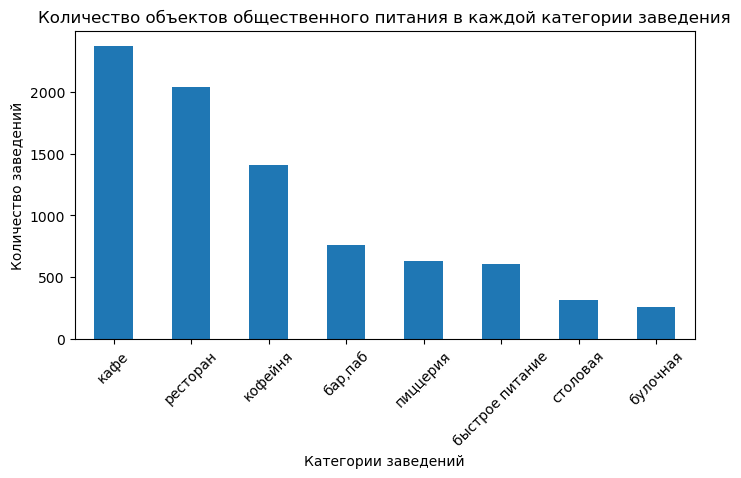

In [26]:
grouped_data.plot(
    kind='bar', 
    figsize=(8, 4),
    title='Количество объектов общественного питания в каждой категории заведения',
    legend=False,
    xlabel='Категории заведений',
    ylabel='Количество заведений',
    rot=45
)
plt.show()

В данных датафрейма представлены **заведения 8 типов**:
- кафе,
- ресторан,
- кофейня,
- паб/бар,
- быстрое питание,
- пиццерия,
- столовая, 
- булочная.

Для визуализации количества заведений в каждом типе заведений была использована столбчатая диаграмма, т.к. нам необходимо сравнить категории данных.

На основе полученной визуализации можно сделать вывод, что в Москве наиболее распространены **кафе (2377 объектов - 28.3%) и рестораны (2042 объектов - 24.3%)**. Меньше всего **столовых (315 объектов - 3.7%) и булочных (256 объектов - 3%)**.

---

### Задача 2. Распределение заведений по районам Москвы

Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы в абсолютном и процентном выражении с использованием метода value_counts().

- административные районы Москвы

In [27]:
grouped_data_district = df_cleaned['district'].value_counts()
grouped_data_district

district
ЦАО     2242
САО      899
ЮАО      892
СВАО     890
ЗАО      850
ВАО      798
ЮВАО     714
ЮЗАО     709
СЗАО     409
Name: count, dtype: int64

In [28]:
grouped_data_district_perc = df_cleaned['district'].value_counts(normalize=True)
grouped_data_district_perc 

district
ЦАО     0.266809
САО     0.106986
ЮАО     0.106153
СВАО    0.105915
ЗАО     0.101154
ВАО     0.094966
ЮВАО    0.084970
ЮЗАО    0.084375
СЗАО    0.048673
Name: proportion, dtype: float64

Построим столбчатую диаграмму для отображения распределения объектов общественного питания в административных районах Москвы с использованием plot(kind='bar')

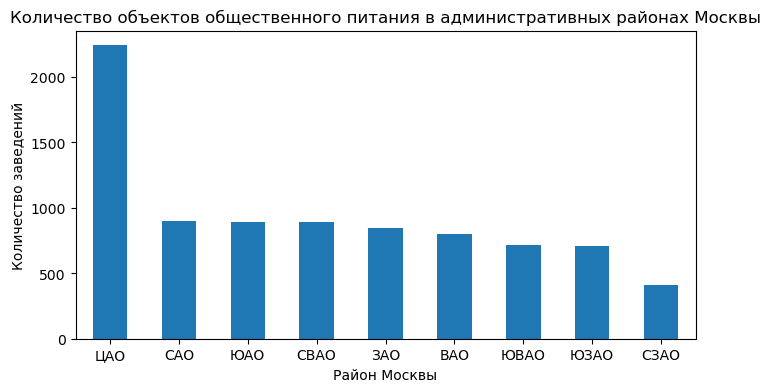

In [29]:
grouped_data_district.plot(
    kind='bar',
    figsize=(8, 4),
    title='Количество объектов общественного питания в административных районах Москвы',
    legend=False,
    xlabel='Район Москвы',
    ylabel='Количество заведений',
    rot=0
)   

plt.show()

- Центральный административный округ Москвы (ЦАО)

In [30]:
cad_group_data = df_cleaned[df_cleaned['district'] == 'ЦАО']['category'].value_counts()
cad_group_data

category
ресторан           670
кафе               464
кофейня            428
бар,паб            364
пиццерия           113
быстрое питание     87
столовая            66
булочная            50
Name: count, dtype: int64

In [31]:
cad_group_data_perc = df_cleaned[df_cleaned['district'] == 'ЦАО']['category'].value_counts(normalize=True)
cad_group_data_perc

category
ресторан           0.298840
кафе               0.206958
кофейня            0.190901
бар,паб            0.162355
пиццерия           0.050401
быстрое питание    0.038805
столовая           0.029438
булочная           0.022302
Name: proportion, dtype: float64

Построим столбчатую диаграмму для отображения распределения объектов общественного питания в Центральном административном округе Москвы (ЦАО) с использованием plot(kind='bar')

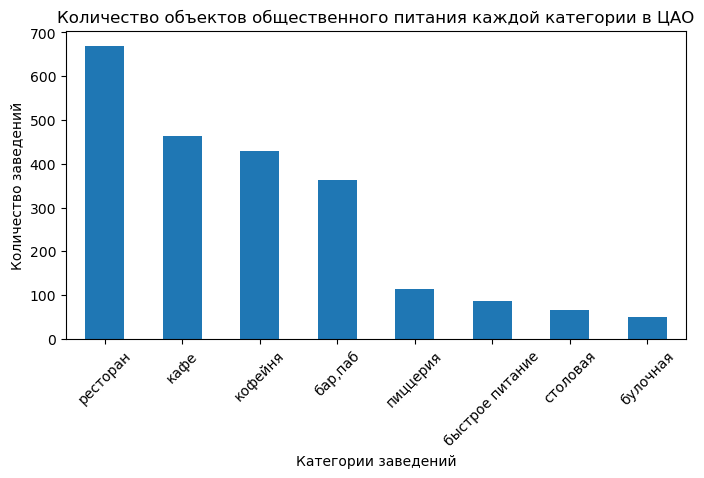

In [32]:
cad_group_data.plot(
    kind='bar',
    figsize=(8, 4),
    title='Количество объектов общественного питания каждой категории в ЦАО',
    legend=False,
    xlabel='Категории заведений',
    ylabel='Количество заведений',
    rot=45
)   

plt.show()

В данных датафрейма есть информация о **9 административных округах Москвы**:
- ЦАО,
- САО,
- СВАО,
- ЮАО,
- ВАО,
- ЗАО,
- ЮВАО,
- ЮЗАО,
- СЗАО.

С использованием метода value_counts() было посчитано **количество заведений в каждом округе**. Самое большое количество заведений в ЦАО (2242 - 26.7% всех заведений). Наблюдается очень высокий разрыв с остальными округами (например, в САО - 899 заведений (10.7%), в СЗАО - 409 заведений (4.9%)). В центре города расположено много офисов, и любят отдыхать туристы.
Для визуализации использована столбчатая диаграмма.

Было посчитано **количество заведений общественного питания каждой категории в Центральном административном округе Москвы (ЦАО)** и построена визуализация с использованием столбчатой диаграммы. В ЦАО наиболее распространены **рестораны (670 - почти 30% от всех заведений)**, менее популярны кафе (464 объектов - 20.7%) и кофейни (428 объектов - 19.1%). Наименьшее количество заведений представлено в категории **'булочная' - 50 заведений (2.2%).**

---

### Задача 3. Распределение сетевых и несетевых заведений

Исследуем соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения в абсолютном и процентном выражении с использованием метода value_counts() и выясним, каких заведений больше — сетевых или несетевых, какие категории заведений чаще являются сетевыми. 

In [33]:
df_chain = df_cleaned['chain'].value_counts()
df_chain

chain
0    5200
1    3203
Name: count, dtype: int64

In [34]:
df_cleaned_perc = df_cleaned['chain'].value_counts(normalize=True)
df_cleaned_perc

chain
0    0.618827
1    0.381173
Name: proportion, dtype: float64

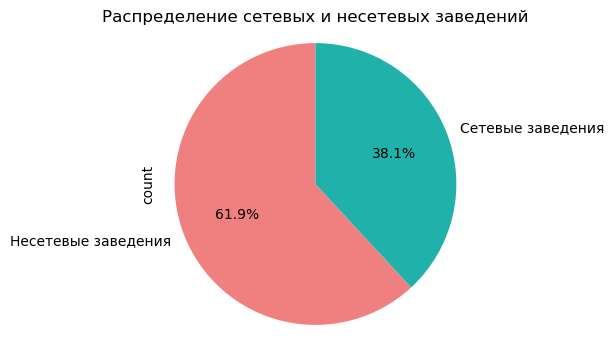

In [35]:
df_chain.plot(
    kind='pie',
    figsize=(4, 4),
    startangle=90,
    legend=False,
    autopct='%1.1f%%',
    labels=['Несетевые заведения', 'Сетевые заведения'],
    colors=['lightcoral', 'lightseagreen']
)

plt.title('Распределение сетевых и несетевых заведений')
plt.axis('equal')
plt.show()

В датасете **сетевые заведения общественного питания составляют 38.1%** от общего числа заведений.

- Теперь рассмотрим распределение сетевых и несетевых заведений по категориям (значения в столбце `chain`: 1 - сетевые заведения, 0 - несетевые). Построим столбчатую диаграмму для визуализации распределения заведений между категориями

In [36]:
df_category = df_cleaned.groupby('category')['chain'].value_counts().unstack(fill_value=0)
df_category_sorted = df_category.sort_values(by=1, ascending=False)
df_category_sorted

chain,0,1
category,,
кафе,1598,779
ресторан,1313,729
кофейня,693,720
пиццерия,303,330
быстрое питание,371,232
"бар,паб",596,168
булочная,99,157
столовая,227,88


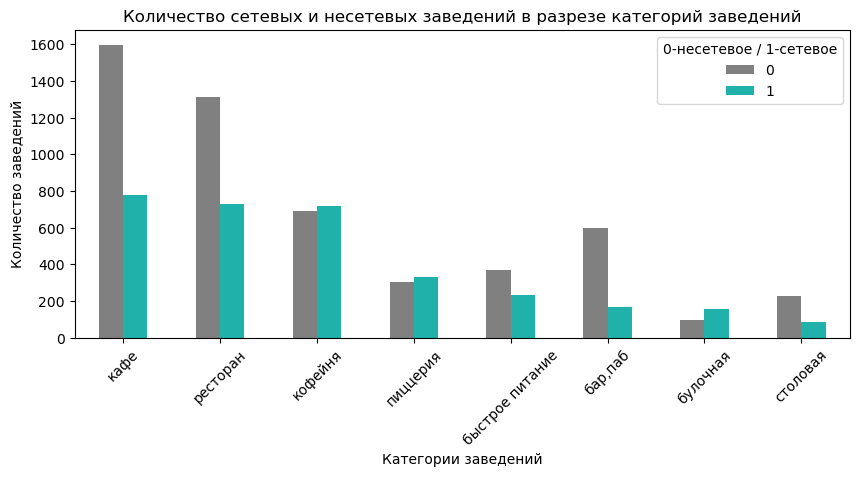

In [37]:
df_category_sorted.plot(
    kind='bar',
    figsize=(10, 4),
    color=['grey', 'lightseagreen']
)

plt.title('Количество сетевых и несетевых заведений в разрезе категорий заведений')
plt.ylabel('Количество заведений')
plt.xlabel('Категории заведений')
plt.xticks(rotation=45)
plt.legend(title='0-несетевое / 1-cетевое')
plt.show()

Рассчитаем долю сетевых заведений в каждой категории заведений и построим столбчатую диаграмму

In [38]:
df_category_sorted['share'] = df_category_sorted[1] / (df_category_sorted[1] + df_category_sorted[0])
df_category_sorted 

chain,0,1,share
category,,,
кафе,1598,779,0.327724
ресторан,1313,729,0.357003
кофейня,693,720,0.509554
пиццерия,303,330,0.521327
быстрое питание,371,232,0.384743
"бар,паб",596,168,0.219895
булочная,99,157,0.613281
столовая,227,88,0.279365


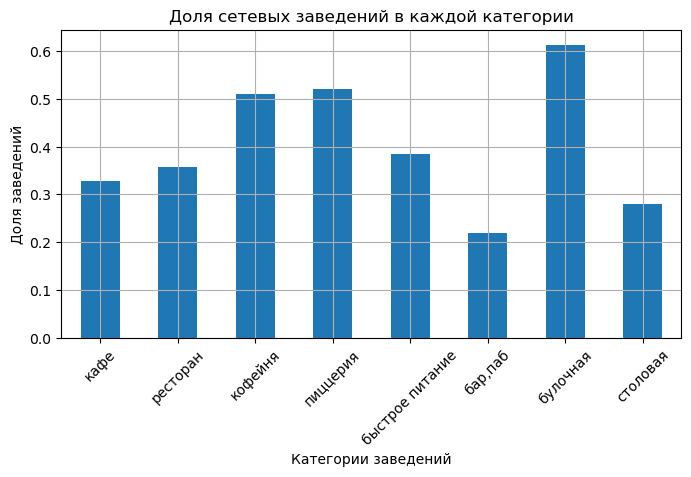

In [39]:
df_category_sorted['share'].plot(
    kind='bar',   
    figsize=(8, 4),
    legend=False
)

plt.title('Доля сетевых заведений в каждой категории')
plt.ylabel('Доля заведений')
plt.xlabel('Категории заведений')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Как и в предыдущих задачах использованы столбчатые диаграммы для визуализации и сравнения категорий.

На диаграмме видно, что **в абсолютных значениях больше всего сетевых заведений** общественного питания в категориях `кафе` (779) и `ресторан`(729), меньше всего в `столовых`(88).

**В процентном выражении больше всего сетевых заведений** в категории `булочная` (61.3%), меньше всего в категории `бар,паб` (22%).

---

### Задача 4. Распределение посадочных мест в заведениях

Исследуем распределение посадочных мест в заведениях с использованием метода describe(), выясним, встречаются ли в данных аномальные значения или выбросы. 
>
Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест.

In [40]:
df_cleaned['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Описание данных говорит о неравномерности их распределения: 
- медиана = 75, 
- среднее значение = 108.4, 
- максимальное значение = 1288. 

Это может свидетельствовать о наличии выбросов или наличии единичных заведений общественного питания с большим количеством посадочных мест. 

Можно построить гистограмму распределения значений и диаграмму размаха, чтобы визуально оценить распределение данных.

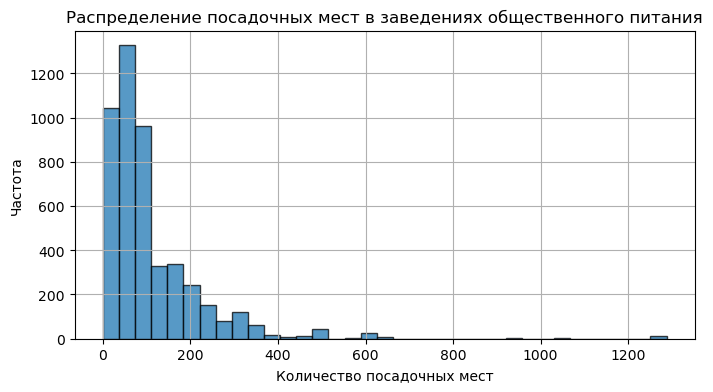

In [41]:
plt.figure(figsize=(8, 4))

df_cleaned['seats'].plot(
    kind='hist', 
    bins=35,
    alpha=0.75,
    edgecolor='black',
    rot=0
)

plt.title('Распределение посадочных мест в заведениях общественного питания')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Частота')
plt.grid()
plt.show()

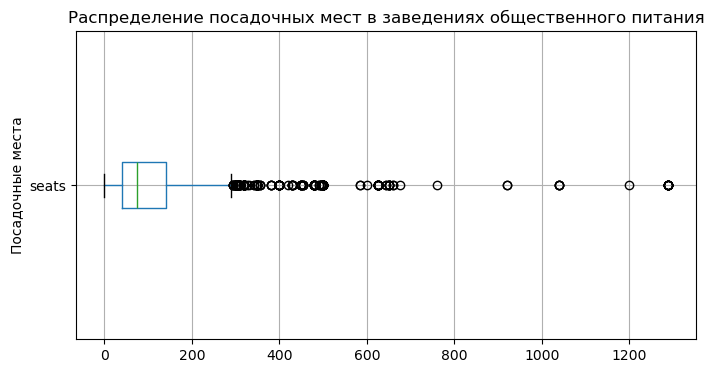

In [42]:
boxplot = df_cleaned.boxplot(
    column='seats',
    vert=False,
    grid=True,
    figsize=(8, 4)
)

boxplot.set_title('Распределение посадочных мест в заведениях общественного питания')
boxplot.set_ylabel('Посадочные места')
plt.show()

Гистограмма распределения и диаграмма размаха показывают наличие большого количества выбросов.

Будем считать условными выбросами значения выше 95-ого процентиля по посадочным местам. Найдем 95-й процентиль с помощью метода quantile(), отфильтруем данные и выведем на экран новое распределение и построим диаграмму размаха.

In [43]:
outliers = df_cleaned['seats'].quantile(0.95)

new_df = df_cleaned.loc[df_cleaned['seats'] < outliers]

new_df['seats'].describe()

count    4550.000000
mean       88.127692
std        70.859617
min         0.000000
25%        40.000000
50%        70.000000
75%       120.000000
max       306.000000
Name: seats, dtype: float64

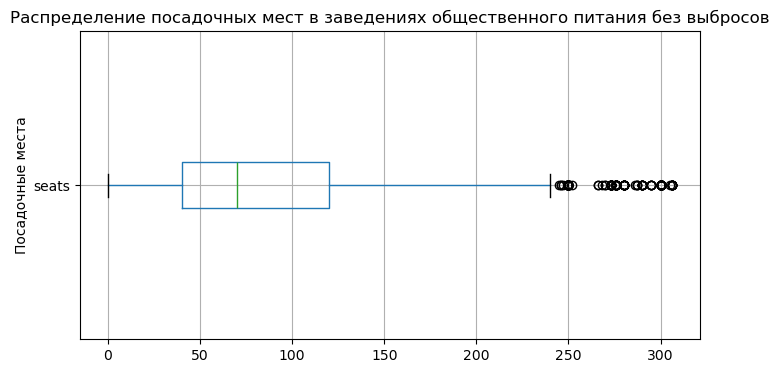

In [44]:
boxplot = new_df.boxplot(
    column='seats',
    vert=False,
    grid=True,
    figsize=(8, 4)
)

boxplot.set_title('Распределение посадочных мест в заведениях общественного питания без выбросов')
boxplot.set_ylabel('Посадочные места')
plt.show()

После удаления выбросов распределение стало более компактным. Среднее значение стало значительно ближе к медиане: было 108.4, стало 88.1, уменьшилось стандартное отклонение: было 122.8, стало 70.9. 

Однако можно сохранить исходные данные для данного исследования. В датасете были оставлены данные с нулевым количеством посадочных мест, т.к. некоторые заведения могут продавать еду/напитки навынос или с доставкой на дом, и могут быть заведения, которые обслуживают крупные мероприятия.

Рассчитаем типичное количество посадочных мест в каждой категории и построим столбчатую диаграмму.

In [45]:
typical_seats = df_cleaned.pivot_table(
    index = 'category', 
    values='seats', 
    aggfunc='median'
).sort_values(by='seats', ascending=False)
typical_seats

,seats
category,
ресторан,86.0
"бар,паб",82.0
кофейня,80.0
столовая,75.5
быстрое питание,65.0
кафе,60.0
пиццерия,55.0
булочная,50.0


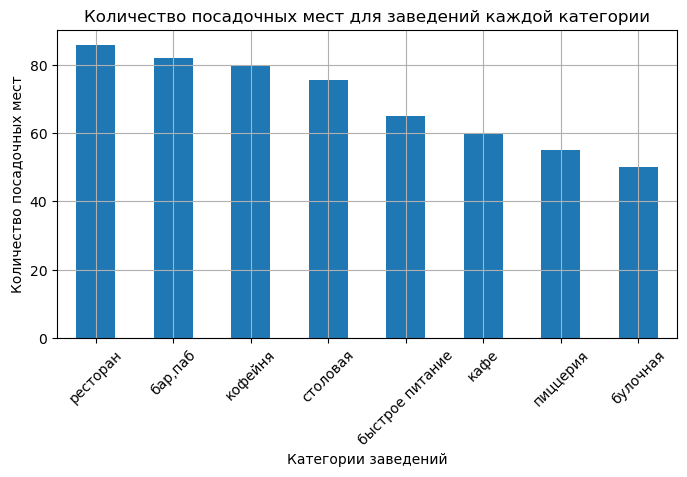

In [46]:
typical_seats.plot(
    kind='bar',
    figsize=(8, 4),
    legend=False
)

plt.title('Количество посадочных мест для заведений каждой категории')
plt.ylabel('Количество посадочных мест')
plt.xlabel('Категории заведений')
plt.xticks(rotation=45)
plt.grid()
plt.show()

- **Наибольшее типичное количество посадочных мест** в ресторане (86) и баре,пабе (82);
- **Наименьшее типичное количество посадочных мест** - в булочной (50) и пиццерии (55).

---

### Задача 5. Распределение рейтингов заведений

Рассчитаем средний рейтинг заведений в зависимости от категорий заведений, для визуализации используем столбчатую диаграмму.

In [47]:
df_pivot = df_cleaned.pivot_table(
    index='category', 
    values='rating', 
    aggfunc='mean'
).sort_values(by='rating', ascending=False)
df_pivot

,rating
category,
"бар,паб",4.387696
пиццерия,4.301264
ресторан,4.290402
кофейня,4.277282
булочная,4.268359
столовая,4.211429
кафе,4.123896
быстрое питание,4.050249


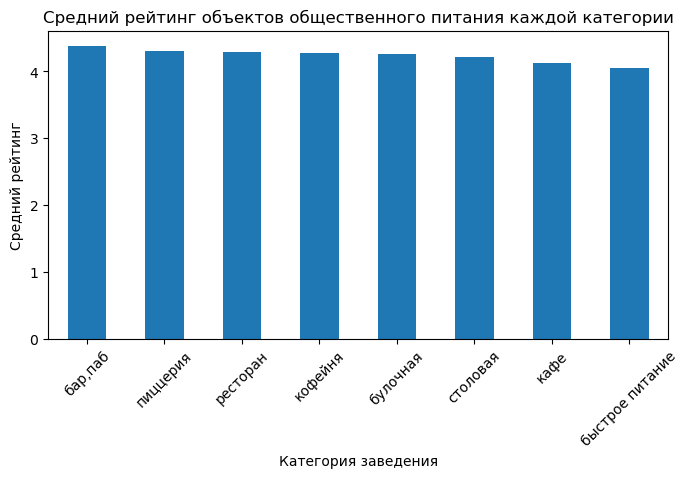

In [48]:
df_pivot.plot(
    kind='bar',
    figsize=(8, 4),
    title='Средний рейтинг объектов общественного питания каждой категории',
    legend=False,
    xlabel='Категория заведения',
    ylabel='Средний рейтинг',
    rot=45
)   

plt.show()

**Средний рейтинг** заведений общественного питания в Москве ни в одной категории **не опускается ниже оценки в 4 балла**: 
- от 4.05 в заведениях быстрого питания до 4.39 в барах,пабах. 

---

### Задача 6. Корреляция рейтингов заведений

Исследуем, с какими данными показывают самую сильную корреляцию рейтинги заведений. Построим и визуализируем с использованием phi_k матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным.

In [49]:
correlation_matrix = df_cleaned[['category', 
                                 'district', 
                                 'chain', 
                                 'seats', 
                                 'price', 
                                 'is_24_7', 
                                 'rating']].phik_matrix()

print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']
Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200701
category,0.189904
is_24_7,0.150210
chain,0.108060
seats,0.000000


Матрица корреляций **не показывает высоких корреляций** между показателями. Самый высокий показатель корреляции рейтинга с  категориями цен (0.22).

Визуализируем результат корреляции с помощью тепловой карты и библиотеки seaborn.

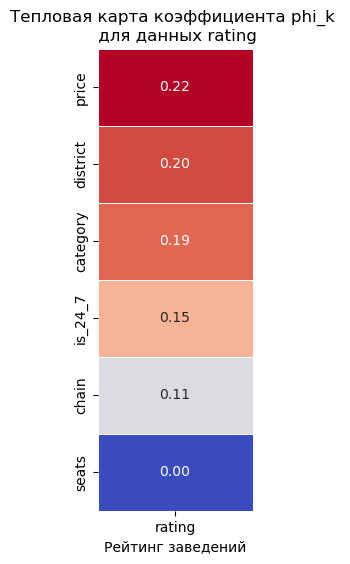

In [50]:
plt.figure(figsize=(2, 6))

data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(
    data_heatmap,
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    linewidths=0.5,
    cbar=False
)

plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведений')
plt.show()

Рассчитаем средние значения рейтинга в зависимости от ценовых категорий.

In [51]:
rating_district = df_cleaned.pivot_table(
    index='price', 
    values='rating', 
    aggfunc='mean'
).sort_values(by='rating', ascending=False)
rating_district

,rating
price,
высокие,4.436611
выше среднего,4.386348
средние,4.297874
низкие,4.173077


При рассмотрении корреляции рейтинга с ценами **прослеживается зависимость среднего рейтинга от уровня цен**: чем выше ценовая категория, тем выше средний рейтинг:
- низкие  цены: рейтинг = 4.17;
- средние цены: рейтинг = 4.3;
- цены выше среднего: рейтинг = 4.39;
- высокие цены: рейтинг = 4.44.

---

### Задача 7. Топ-15 популярных сетей в Москве

Найдем топ-15 популярных сетей в Москве и посчитаем для них значения среднего рейтинга, определим, к какой категории эти заведения относятся. 
- для лучшей читаемости при визуализации переименуем 'Кулинарная Лавка Братьев Караваевых' в краткое название 'Братья Караваевы';
- отфильтруем сетевые заведения общественного питания;
- отберем топ-15 сетей по количестве заведений.

In [52]:
df_cleaned['name'] = df_cleaned['name'].replace({'Кулинарная Лавка Братьев Караваевых':'Братья Караваевы'})

df_filtered = df_cleaned[df_cleaned['chain'] == 1]

df_grouped = df_filtered.groupby('name', observed=True).agg({
    'id': 'count'
}).sort_values('id', ascending=False)

top_15 = df_grouped.head(15)
top_15

,id
name,
Шоколадница,120
Домино'С Пицца,76
Додо Пицца,74
One Price Coffee,71
Яндекс Лавка,69
Cofix,65
Prime,50
Хинкальная,44
Кофепорт,42


Визуализируем наиболее популярные сетевые заведения. Т.к. в одной сети (`Шоколадница`) количество заведений значительно отличается от остальных, используем линейчатую диаграмму.

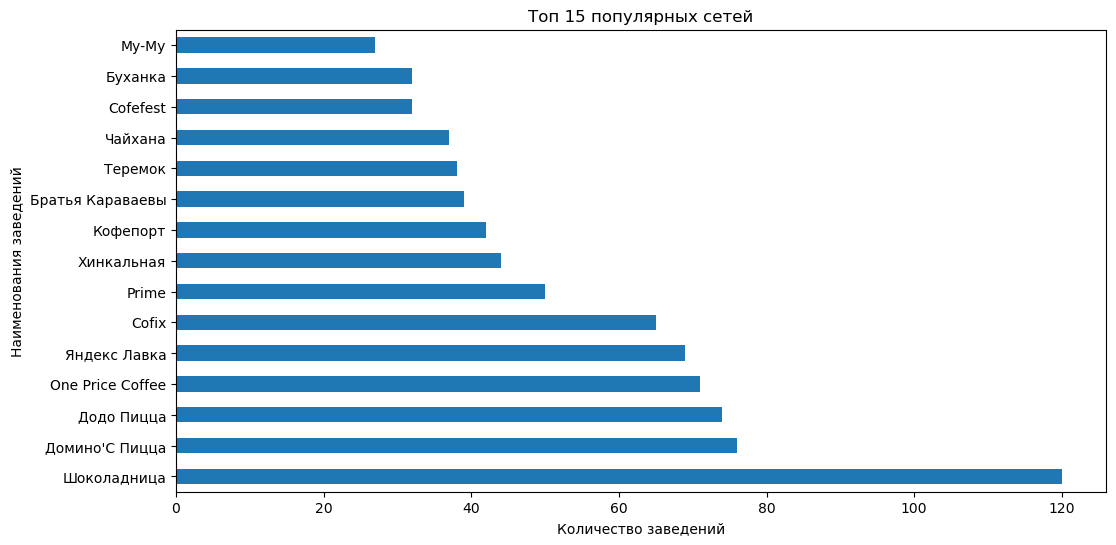

In [53]:
top_15.plot(
    kind='barh', 
    figsize=(12, 6),
    title='Топ 15 популярных сетей',
    legend=False,
    xlabel='Количество заведений',
    ylabel='Наименования заведений',
    rot=0
)
plt.show()

Рассчитаем средний рейтинг топ-15 заведений общественного питания и визуализируем с использованием столбчатой диаграммы

In [54]:
df_grouped = df_filtered.groupby('name', observed=True).agg({
    'id': 'count',
    'rating': 'mean'
}).sort_values('id', ascending=False)
top_rating = df_grouped.head(15)
top_rating

,id,rating
name,,
Шоколадница,120,4.177500
Домино'С Пицца,76,4.169737
Додо Пицца,74,4.286486
One Price Coffee,71,4.064789
Яндекс Лавка,69,3.872464
Cofix,65,4.075385
Prime,50,4.116000
Хинкальная,44,4.322727
Кофепорт,42,4.147619


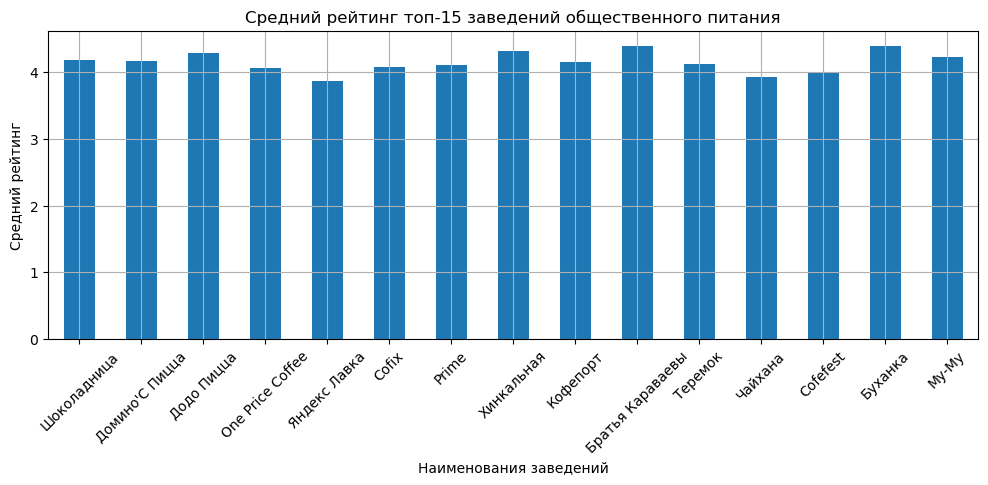

In [55]:
top_rating['rating'].plot(
    kind='bar', 
    figsize=(12, 4),
    title='Средний рейтинг топ-15 заведений общественного питания',
    legend=False,
    xlabel='Наименования заведений',
    ylabel='Средний рейтинг',
    rot=45,
    grid=True
)
plt.show()

Средний рейтинг топ-15 сетей общественного питания колеблется в пределах от 3.87 (Яндекс Лавка) до 4.4 (Буханка) и 4.39 (Братья Караваевы).

Присоединим категорию заведения к топ-15 сетевых заведений с использованием метода .merge().

In [56]:
top_rating_cat = pd.merge(
    top_rating, 
    df_filtered[['name', 'category']].drop_duplicates(), on = 'name')
top_rating_cat

,name,id,rating,category
0,Шоколадница,120,4.177500,кофейня
1,Шоколадница,120,4.177500,кафе
2,Домино'С Пицца,76,4.169737,пиццерия
3,Додо Пицца,74,4.286486,пиццерия
4,One Price Coffee,71,4.064789,кофейня
5,Яндекс Лавка,69,3.872464,ресторан
6,Cofix,65,4.075385,кофейня
7,Prime,50,4.116000,ресторан
8,Prime,50,4.116000,кафе
9,Хинкальная,44,4.322727,быстрое питание


В результате присоединения категорий заведений, получилось 32 значения. Значительная часть заведений в списке топ-15 представлена в нескольких категориях, например, 'Му-Му' соответствуют 7 категорий, 'Хинкальной' - 5 категорий.

Это может объясняться тем, что заведения одной сети могут иметь разное меню или ассортимент товаров, количество посадочных мест, быть ориентированными на разную клиентуру, соответственно, подходить под разные категории заведений. Возможно, что некоторые категории присвоены ошибочно, например, пиццерия и бар,паб для "Му-Му". Но в подобном исследовании с большим количеством заведений аналитик может не знать продукцию заведений и непонятно, на какую категорию можно заменить. 

---

### Задача 8. Средний чек заведений 

- изучим вариацию среднего чека заведения в зависимости от района Москвы (рассчитаем среднее значение и по медиане), визуализируем полученный результат с использованием линейчатой диаграммы;
- проанализируем цены в разных округах, оценим, как удалённость от центра влияет на цены в заведениях.


In [57]:
df_middle_bill = df_cleaned.groupby('district', observed=True).agg({
    'middle_avg_bill': 'mean'
}).sort_values('middle_avg_bill', ascending=False)
df_middle_bill

,middle_avg_bill
district,
ЦАО,1191.057547
ЗАО,1053.225490
САО,927.959627
ЮАО,834.398089
СЗАО,822.222930
ВАО,820.626923
ЮЗАО,792.561702
СВАО,716.611296
ЮВАО,654.097938


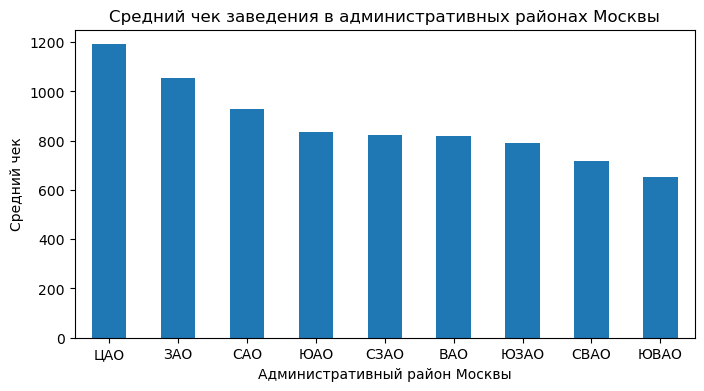

In [58]:
df_middle_bill.plot(
    kind='bar', 
    figsize=(8, 4),
    title='Средний чек заведения в административных районах Москвы',
    legend=False,
    xlabel='Административный район Москвы',
    ylabel='Средний чек',
    rot=0
)
plt.show()

In [59]:
df_middle_bill_median = df_cleaned.groupby('district', observed=True).agg({
    'middle_avg_bill': 'median'
}).sort_values('middle_avg_bill', ascending=False)
df_middle_bill_median

,middle_avg_bill
district,
ЗАО,1000.0
ЦАО,1000.0
СЗАО,700.0
САО,650.0
ЮЗАО,600.0
ВАО,575.0
СВАО,500.0
ЮАО,500.0
ЮВАО,450.0


Если рассчитать средний чек по медиане, то:
- самый высокий средний чек заведения в Москве в ЦАО и ЗАО равен 1000 рублей.
- самый низкий средний чек заведения в Москве в ЮВАО - 450 рублей.

По мере удаления от центра Москвы, средний чек уменьшается. Причем на севере и западе Москвы он выше, чем на юге и востоке, соответственно. 

---

### Промежуточный вывод этапа исследовательского анализа данных

Анализ взаимосвязи данных показал, что:
- Наиболее популярные категории заведений общественного питания в Москве: кафе (2377 - 28.3%), рестораны (2042 - 24.3%), кофейни (1413). Наименее распространены столовые (315 - 3.7%) и булочные (256 - 3%). 
- В исследуемых данных присутствуют 9 административных района Москвы, наибольшее количество заведений в ЦАО - 2242 (26.7%), в остальных округах количество заведений в 2 и более раз меньше. В центре Москвы много туристических объектов, а также офисных и административных учреждений, что объясняет большее количество заведений. Проведен анализ категорий заведений в ЦАО: наиболее распространены рестораны (670 заведений - 30%), менее популярны кафе (464 - 20.7%) и кофейни (428 - 19.1%), наименьшее количество заведений представлено в категории 'булочная' - 50 заведений (2.2%).
- 38% всех заведений общественного питания - сети. В абсолютных значениях больше всего сетевых заведений общественного питания в категориях кафе (779) и ресторан(729), меньше всего в столовых(88). В процентном выражении больше всего сетевых заведений в категории булочная (61.3%), меньше всего в категории бар,паб (22%).
- Наиболее типичное количество посадочных мест в заведениях:
    - рестораны - 86; 
    - бары,пабы - 82;
    - кофейня - 80;
    - столовая - 75;
    - быстрое питание - 65;
    - кафе - 60;
    - пиццерия - 55;
    - булочная - 50.
- Средний рейтинг заведений общественного питания в Москве ни в одной категории не опускается ниже оценки в 4 балла: 
    - самый высокий средний рейтинг в пабах,барах (4.39); 
    - булочная, кофейня, ресторан, пиццерия (от 4.27 до 4.3);
    - заведения быстрого питания (4.05), кафе (4.12) и столовая (4.21).
- Прослеживается зависимость среднего рейтинга от уровня цен: чем выше ценовая категория, тем выше средний рейтинг: высокие цены: рейтинг = 4.44, низкие цены: рейтинг = 4.17. Чем выше средний чек в заведениях, тем более высокие требования предъявляются к стандартам обслуживания и качеству еды. А т.к. заведения заинтересованы в поддержании рейтинга и сохранении клиентуры, следовательно, уделяют повышенное внимание к своей репутации, и, соответственно, и рейтинг выше.
- Среди сетевых заведений самая крупная сеть - 'Шоколадница' (120 точек), затем следуют пиццерии (Домино'С Пицца - 76 точек, Додо Пицца - 74 точек). Самый высокий рейтинг среди топ-15 сетевых заведений: Буханка - 4.4 и Братья Караваевы - 4.39, Хинкальная - 4.32. Самый низкий рейтинг: Яндекс Лавка - 3.87, Чайхана - 3.92,  Cofefest - 3.98.
- Самый высокий средний чек заведения в ЦАО (1191) и  ЗАО (1053), самый низкий - в ЮВАО.


## 4. Итоговый вывод и рекомендации


В ходе исследования были проанализированы данные о 8403 заведениях общественного питания города Москвы на основе данных сервисов Яндекс Карты и Яндекс Бизнес за лето 2022 года. Данные включали информацию о заведениях в 9 административных районах Москвы, о 8 типах заведений, включая сетевые заведения, о посадочных местах, о рейтинге и уровне цен. Акцент исследования - поиск взаимосвязи рейтинга заведений общественного питания с разными факторами.

### 4.1. Общий обзор проделанной работы

Исследовательский анализ позволил сделать следующие выводы:

- Наиболее популярные категории заведений общественного питания в Москве: кафе (2377), рестораны (2042), кофейни (1413). Большая часть заведений находится в центре Москвы (ЦАО). 

- Средний рейтинг заведений достаточно высок: от 4.05 до 4.39 в зависимости от типа заведения, например: 4.28 в кофейнях и 4.29 в ресторанах.

- Средний рейтинг зависит от ценовой категории заведения: чем выше уровень цен, тем выше рейтинг.

- Самые высокие цены в центре Москвы (ЦАО) и ЗАО: средний чек = 1191 и 1053 рублей, соответственно.

- Сетевые заведения составляют 38% от всех заведений общественного питания в Москве. В процентном выражении больше всего сетевых заведений в категории булочная (61.3%).

### 4.1. Рекомендации на основе анализа данных

В качестве рекомендации следует обратить внимание на типы заведений, которые не представлены широко распространенными сетями, т.к. сети затрудняют выход на рынок. Среди сетевых заведений наименее представлены следующие типы заведений: бар,паб (22%),столовая (28%), кафе (33%) и ресторан (36%). 

Для перечисленных типов заведений характерны не самые высокие средние рейтинги (кроме типа бар,паб, где самый высокий средний рейтинг - 4.39): столовая - 4.21, кафе - 4.12, ресторан - 4.29. Вероятно, сетевым заведениям проще устанавливать стандарты и в том числе проще соответствовать им, имея стандартизированное меню, оформление точек, требования к обслуживающему персоналу. 

Для открытия заведения рекомендован Северо-Западный административный округ Москвы. В данном округе наименьшее количество заведений (409), при этом средний чек достаточно высок - 822 рубля. Также можно рассмотреть ЗАО (850 заведений, средний чек - 1053 рубля) и САО (899 заведений, средний чек - 927 рубля).